In [101]:
import pandas as pd
import numpy as np

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pydotplus

from scipy import stats
# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import log_loss
#preprocessing

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

sc = StandardScaler()
# creating regression
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [102]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


In [103]:
df=pd.read_csv('HR_data1.csv')
df.head(2)

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined


# Preprocessing

In [104]:
df['Status'].value_counts()

Joined        7313
Not Joined    1682
Name: Status, dtype: int64

In [105]:
# Converting Status as 0's and 1's
# creating a dict file  
status = {'Joined': 1,'Not Joined': 0}  
df.Status = [status[item] for item in df.Status] 
df.head(2)      

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1


In [106]:
df['Status'].value_counts()

1    7313
0    1682
Name: Status, dtype: int64

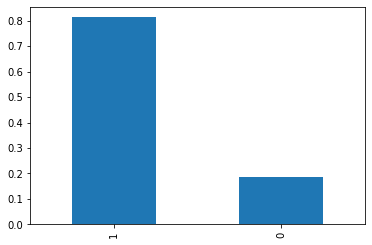

In [107]:
about_target= df['Status'].value_counts(normalize=True)
about_target.plot(kind='bar')
plt.show()

In [108]:
# clearly we can see its a unbalanced data,we need to use SMOTE to make it balanced data onceee create dummies to dataset

# Visualization

<Figure size 720x432 with 0 Axes>

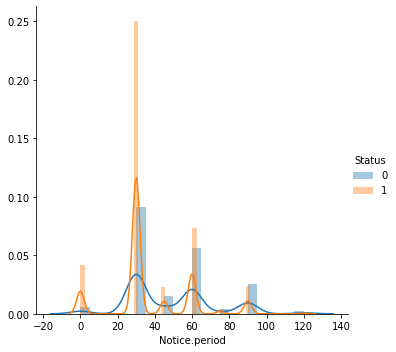

In [109]:
plt.figure(figsize=(10,6))
sns.FacetGrid(df,hue='Status',size=5).map(sns.distplot,'Notice.period').add_legend()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

<Figure size 720x576 with 0 Axes>

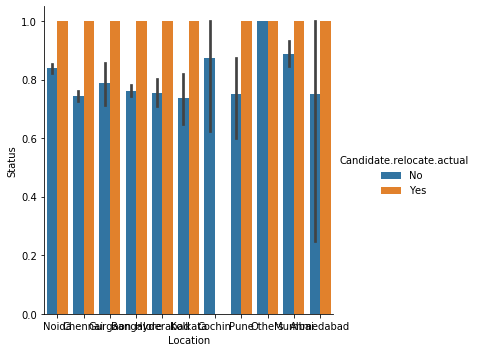

In [110]:
plt.figure(figsize=(10,8))
sns.catplot(x="Location", y="Status",hue='Candidate.relocate.actual', kind="bar", data=df)
plt.xticks()

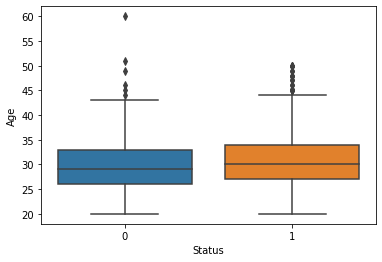

In [111]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Status',y='Age',data=df)
plt.show()

<Figure size 720x720 with 0 Axes>

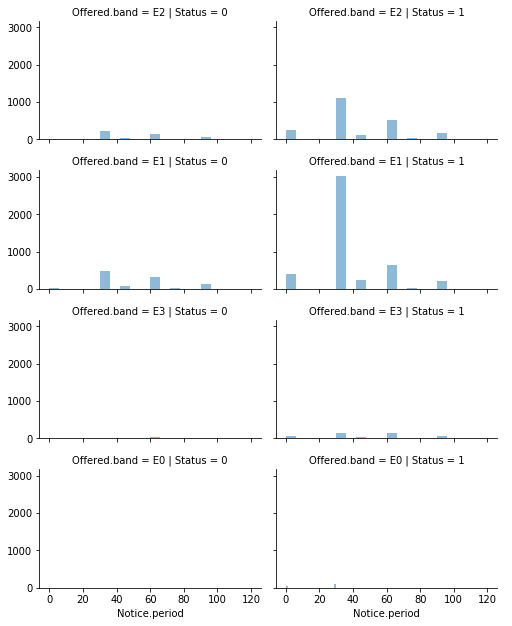

In [112]:
#Survival wrt pclass
plt.figure(figsize=(10,10))
grid = sns.FacetGrid(df, col='Status', row='Offered.band', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Notice.period', alpha=.5, bins=20)
grid.add_legend();

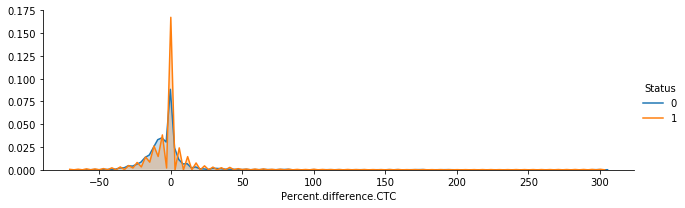

In [113]:
fig = sns.FacetGrid(data=df,hue='Status',aspect=3)
fig.map(sns.kdeplot,'Percent.difference.CTC',shade=True)
fig.add_legend()
plt.show()

In [114]:
#df['Duration.to.accept.offer'].value_counts()
df['DOJ.Extended'].value_counts()

No     4788
Yes    4207
Name: DOJ.Extended, dtype: int64

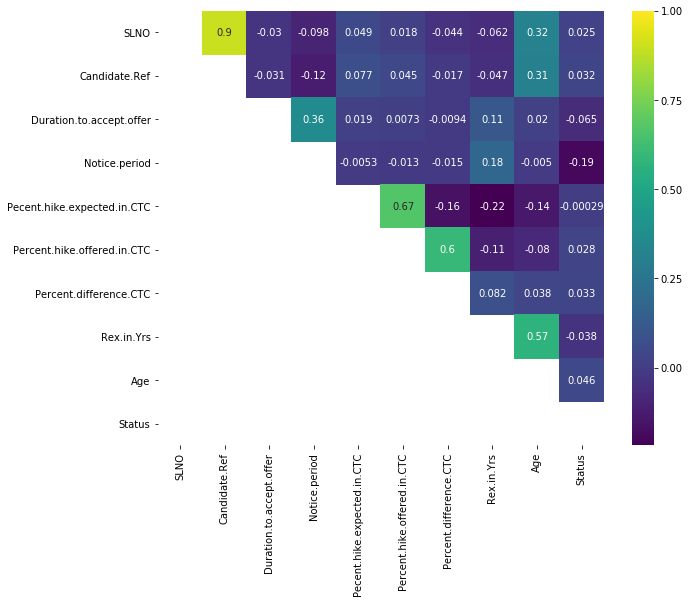

In [115]:
corr= df.corr()
mask=np.zeros_like(corr)
mask[np.tril_indices_from(corr)]=1
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='viridis',mask=mask)
plt.show()


In [116]:
# percentage of missing values
print('INFO: Percentage of missing values in the data=',df.isnull().sum().sum()/len(df))
print(df.isnull().sum()*100 /len(df))

INFO: Percentage of missing values in the data= 0.0
SLNO                           0.0
Candidate.Ref                  0.0
DOJ.Extended                   0.0
Duration.to.accept.offer       0.0
Notice.period                  0.0
Offered.band                   0.0
Pecent.hike.expected.in.CTC    0.0
Percent.hike.offered.in.CTC    0.0
Percent.difference.CTC         0.0
Joining.Bonus                  0.0
Candidate.relocate.actual      0.0
Gender                         0.0
Candidate.Source               0.0
Rex.in.Yrs                     0.0
LOB                            0.0
Location                       0.0
Age                            0.0
Status                         0.0
dtype: float64


# Threre is no null values

In [117]:
# looking for any unique value columns:
for col in df.columns:
    if len(df[col].unique())==1:
        print('{} variable has Zero variance '.format(col))
print('done')

done


In [118]:
### No columns has unique values

In [119]:
# Copying data 
data=df.copy()

In [120]:
data.head(2)

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,1
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,1


In [121]:
data.drop(columns=(['Candidate.Ref','SLNO','Age','Pecent.hike.expected.in.CTC','Percent.hike.offered.in.CTC']),inplace=True)

In [122]:
data.head(2)

,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Status
0,Yes,14,30,E2,42.86,No,No,Female,Agency,7,ERS,Noida,1
1,No,18,30,E2,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,1


In [123]:
data=pd.get_dummies(data,drop_first=False)

In [124]:
data.head(2)

,Duration.to.accept.offer,Notice.period,Percent.difference.CTC,Rex.in.Yrs,Status,DOJ.Extended_No,DOJ.Extended_Yes,Offered.band_E0,Offered.band_E1,Offered.band_E2,...,Location_Bangalore,Location_Chennai,Location_Cochin,Location_Gurgaon,Location_Hyderabad,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune
0,14,30,42.86,7,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,18,30,180.00,8,1,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [125]:
data['Status'].value_counts()

1    7313
0    1682
Name: Status, dtype: int64

In [126]:
# MAke the data as balanced data using SMOTE

from imblearn.over_sampling import SMOTE  #synthetic Minorty Oversampling T

In [127]:
y=data.pop('Status')
x=data

In [128]:
x.shape,y.shape

((8995, 39), (8995,))

In [129]:
#APplying SMOTE to remove imbalnce in dependent variable

In [130]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y== 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
x_re,y_re= SMOTE().fit_resample(x,y)
#y_res=pd.Series(y_re)
  
#print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape)) 
#print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_re == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_re == 0)))

Before OverSampling, counts of label '1': 7313
Before OverSampling, counts of label '0': 1682 

After OverSampling, counts of label '1': 7313
After OverSampling, counts of label '0': 7313


### 1.Build a logisticRegression model to predict the probability of the candidate joining the company.

In [131]:
np.random.seed(101)
from sklearn.model_selection import train_test_split
#stratified sampling
x_train,x_test,y_train,y_test = train_test_split(x_re,y_re, test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 39), (2926, 39), (11700,), (2926,))

In [132]:
mmx= MinMaxScaler()  
xm_train =mmx.fit_transform(x_train)
xm_test =mmx.fit_transform(x_test)

In [133]:
#x_train.drop('const',axis=1,inplace=True)

In [134]:
model=LogisticRegression()

In [135]:
model.fit(xm_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
#y_pred_prob =model.predict_proba(x)  
#y_pred= model.predict(x) 

In [137]:
import innomatics

In [138]:
cmetrics= innomatics.classification_metrics(model,xm_train,xm_test,y_train,y_test)
cmetrics.summary(labels=['0','1'])

Summary Report
Confusion Matrix:

for train data

        0     1    tot
0    4567  1316   5883
1     215  5602   5817
tot  4782  6918  11700

for test data

        0     1   tot
0    1110   320  1430
1      39  1457  1496
tot  1149  1777  2926
Classification Report:

 for train data

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      5883
           1       0.81      0.96      0.88      5817

    accuracy                           0.87     11700
   macro avg       0.88      0.87      0.87     11700
weighted avg       0.88      0.87      0.87     11700


 for test data

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      1430
           1       0.82      0.97      0.89      1496

    accuracy                           0.88      2926
   macro avg       0.89      0.88      0.88      2926
weighted avg       0.89      0.88      0.88      2926

Kappa Score for train data: 0.738559842119

### 2.Find the significant features form the above model and build another logisticregression model with only the significant features

In [139]:
## Feature importance using LAsso regression
from sklearn.linear_model import Lasso, Ridge

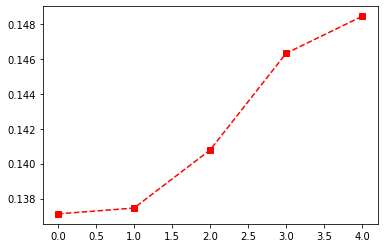

In [140]:
alpha = [0.0001, 0.001, 0.01,0.1,1]
loss_values = []
for a in alpha:
    model_lasso = Lasso(a)
    model_lasso.fit(x,y)
    # predicting
    y_pred = model_lasso.predict(x)
    #
    loss = mean_squared_error(y,y_pred)
    loss_values.append(loss)

plt.plot(loss_values,'r--s')
plt.show()

In [141]:
# fitting mode
model_lasso = Lasso(0.001)
model_lasso.fit(x,y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [142]:
# using cv take kfolds =5 , those samples send them to select features

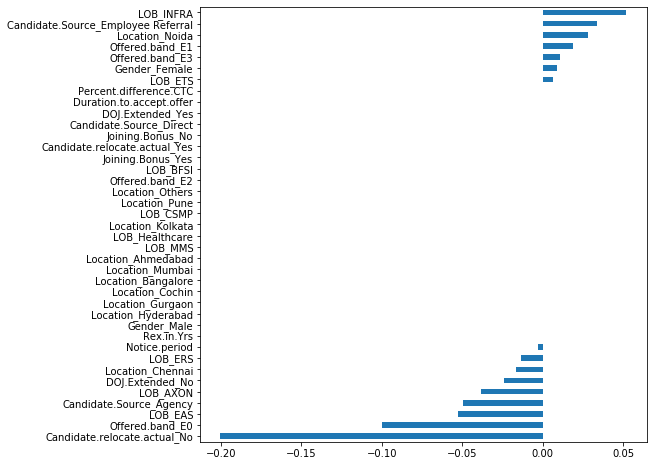

In [143]:
pars = model_lasso.sparse_coef_.toarray().flatten()
plt.figure(figsize=(8,8))
features_importance = pd.Series(pars,index=x.keys()).sort_values(ascending=True)
features_importance.plot('barh')
plt.show()


In [144]:
coef = pd.Series(model_lasso.coef_, index = x.columns)
imp_coef = coef.sort_values()

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated " +  str(sum(coef == 0)) + " variables")

Lasso picked 21 variables and eliminated 18 variables


In [145]:
#features_importance.rank

In [146]:
fea = sum(coef != 0)
features_sel = list(imp_coef[imp_coef!=0].sort_values(ascending=False).index)[:fea]
features_sel

['LOB_INFRA',
 'Candidate.Source_Employee Referral',
 'Location_Noida',
 'Offered.band_E1',
 'Offered.band_E3',
 'Gender_Female',
 'LOB_ETS',
 'Percent.difference.CTC',
 'Duration.to.accept.offer',
 'DOJ.Extended_Yes',
 'Gender_Male',
 'Rex.in.Yrs',
 'Notice.period',
 'LOB_ERS',
 'Location_Chennai',
 'DOJ.Extended_No',
 'LOB_AXON',
 'Candidate.Source_Agency',
 'LOB_EAS',
 'Offered.band_E0',
 'Candidate.relocate.actual_No']

In [147]:
# Building model by Considering the above features

In [148]:
xm_train=pd.DataFrame(xm_train)
xm_test=pd.DataFrame(xm_test)

In [149]:
xla_train = x_train[features_sel]
xla_test = x_test[features_sel]

In [150]:
mmx= MinMaxScaler()  
xla_train =mmx.fit_transform(xla_train)
xla_test =mmx.fit_transform(xla_test)

In [151]:
model_la=LogisticRegression()
model_la.fit(xla_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred_prob_la =model_la.predict_proba(xla_test)  
y_pred_la= model_la.predict(xla_test) 

In [153]:
cmetrics= innomatics.classification_metrics(model_la,xla_train,xla_test,y_train,y_test)
cmetrics.summary(labels=['0','1'])

Summary Report
Confusion Matrix:

for train data

        0     1    tot
0    4602  1281   5883
1    1112  4705   5817
tot  5714  5986  11700

for test data

        0     1   tot
0    1117   313  1430
1     251  1245  1496
tot  1368  1558  2926
Classification Report:

 for train data

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      5883
           1       0.79      0.81      0.80      5817

    accuracy                           0.80     11700
   macro avg       0.80      0.80      0.80     11700
weighted avg       0.80      0.80      0.80     11700


 for test data

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1430
           1       0.80      0.83      0.82      1496

    accuracy                           0.81      2926
   macro avg       0.81      0.81      0.81      2926
weighted avg       0.81      0.81      0.81      2926

Kappa Score for train data: 0.590993808745

In [154]:
# Accuracy decreased so going for backward elimination method

In [155]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
xc=sm.add_constant(x_re)
xdata=xc.copy()
model1=sm.OLS(y_re,xdata).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     441.8
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:56:11   Log-Likelihood:                -5014.5
No. Observations:               14626   AIC:                         1.011e+04
Df Residuals:                   14587   BIC:                         1.040e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [156]:
xdata.drop('Percent.difference.CTC',axis=1,inplace=True)
model1=sm.OLS(y_re,xdata).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     453.6
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:56:11   Log-Likelihood:                -5015.6
No. Observations:               14626   AIC:                         1.011e+04
Df Residuals:                   14588   BIC:                         1.040e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [157]:
xdata.drop('Location_Ahmedabad',axis=1,inplace=True)
model1=sm.OLS(y_re,xdata).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     466.1
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:56:11   Log-Likelihood:                -5016.6
No. Observations:               14626   AIC:                         1.011e+04
Df Residuals:                   14589   BIC:                         1.039e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [158]:
xdata.drop('Rex.in.Yrs',axis=1,inplace=True)
model1=sm.OLS(y_re,xdata).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Status   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     479.4
Date:                Sat, 08 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:56:11   Log-Likelihood:                -5017.7
No. Observations:               14626   AIC:                         1.011e+04
Df Residuals:                   14590   BIC:                         1.038e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [159]:
xdata.columns

Index(['const', 'Duration.to.accept.offer', 'Notice.period', 'DOJ.Extended_No',
       'DOJ.Extended_Yes', 'Offered.band_E0', 'Offered.band_E1',
       'Offered.band_E2', 'Offered.band_E3', 'Joining.Bonus_No',
       'Joining.Bonus_Yes', 'Candidate.relocate.actual_No',
       'Candidate.relocate.actual_Yes', 'Gender_Female', 'Gender_Male',
       'Candidate.Source_Agency', 'Candidate.Source_Direct',
       'Candidate.Source_Employee Referral', 'LOB_AXON', 'LOB_BFSI',
       'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare',
       'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore', 'Location_Chennai',
       'Location_Cochin', 'Location_Gurgaon', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Noida',
       'Location_Others', 'Location_Pune'],
      dtype='object')

In [160]:
# building model Using Logistic regression with featrues selcted from backward elimination mehtod
np.random.seed(101)
from sklearn.model_selection import train_test_split
#stratified sampling
x_train,x_test,y_train,y_test = train_test_split(xdata,y_re, test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape
model_back=LogisticRegression(fit_intercept=False)
model_back.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
1260/313

4.02555910543131

In [162]:
cmetrics= innomatics.classification_metrics(model_back,x_train,x_test,y_train,y_test)
cmetrics.summary(labels=['0','1'])

Summary Report
Confusion Matrix:

for train data

        0     1    tot
0    4586  1297   5883
1     295  5522   5817
tot  4881  6819  11700

for test data

        0     1   tot
0    1115   315  1430
1      64  1432  1496
tot  1179  1747  2926
Classification Report:

 for train data

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      5883
           1       0.81      0.95      0.87      5817

    accuracy                           0.86     11700
   macro avg       0.87      0.86      0.86     11700
weighted avg       0.88      0.86      0.86     11700


 for test data

              precision    recall  f1-score   support

           0       0.95      0.78      0.85      1430
           1       0.82      0.96      0.88      1496

    accuracy                           0.87      2926
   macro avg       0.88      0.87      0.87      2926
weighted avg       0.88      0.87      0.87      2926

Kappa Score for train data: 0.728117291062

In [163]:
# Got Same Accuracy from backward elimination feature selction and from Lasso reg fetures

In [164]:
from sklearn.metrics import roc_curve, auc

In [165]:
y_pred_prob = model_la.predict_proba(xla_train)
y_pred_prob_p =y_pred_prob[:,1]

In [166]:
xla_train.shape,y_train.shape

((11700, 21), (11700,))

In [167]:
fpr,tpr,threh = roc_curve(y_train,y_pred_prob_p)
score = auc(fpr,tpr)

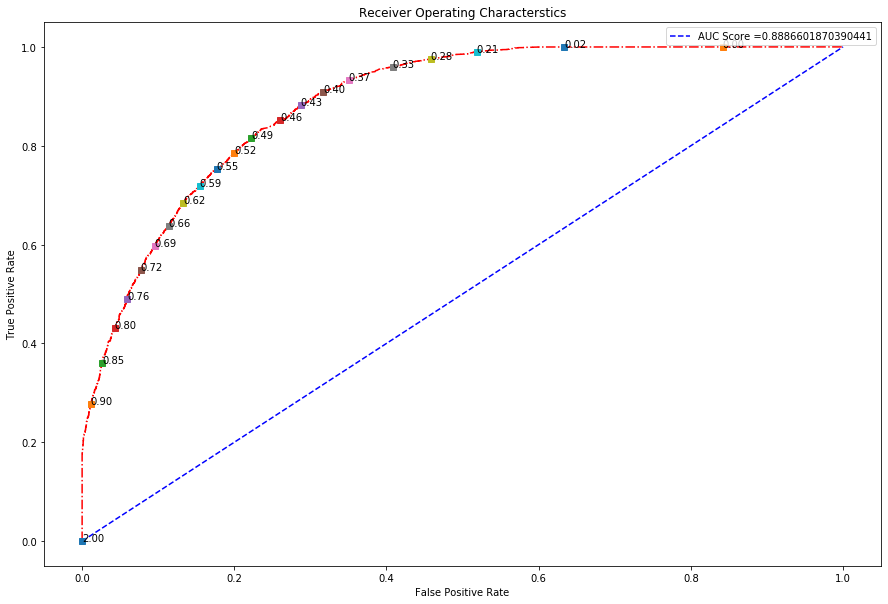

In [168]:
plt.figure(figsize=(15,10))
plt.plot([0,1],[0,1],'b--')
plt.plot(fpr,tpr,'r-.')
for i in range(0,len(threh),150):
    plt.text(fpr[i],tpr[i],"%0.2f"%threh[i])
    plt.plot(fpr[i],tpr[i],'s')
    
plt.legend(['AUC Score ={0:5}'.format(score)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics')
plt.show()

In [169]:
# take confusion matrix and calculate fpr/fnr i for loop

### Use the following cost to find optimal cut-off probability to determine if a candidate will join or not • Cost of predicting “NotJoining” as “Joining”(FPs) cases is 3times more than predicting “Joining” as “NotJoining”(FNs) 

In [170]:
from sklearn.metrics import confusion_matrix, classification_report

In [171]:
y_pred = model_la.predict(xla_train)

In [172]:
from sklearn import metrics

In [173]:
y_pred_prob = model_la.predict_proba(xla_train)

In [174]:
y_pred_prob[1]

array([0.39756087, 0.60243913])

In [175]:
class predictor():
    def __init__(self):
        self.prob = 0.5 # default probability
        
    def threshold(self,value):
        if value <= self.prob:
            return 0
        else:
            return 1

In [176]:
predict = predictor()

In [177]:
predict.prob = 0.4074 # setting probabability
y_pred_class = np.array(list(map(predict.threshold,y_pred_prob_p)))

In [178]:
cm = metrics.confusion_matrix(y_train,y_pred_class)
cm = pd.DataFrame(cm,index=[0,1],columns=[0,1])
cm['tot'] = cm.sum(axis=1)
cm.loc['tot'] = cm.sum(axis=0)
cm

,0,1,tot
0,4046,1837,5883
1,547,5270,5817
tot,4593,7107,11700


In [179]:
tp=cm[0][0]
fp=cm[0][1]
tn=cm[1][1]
fn=cm[1][0]
fn

1837

In [180]:
print('Sensitivity (TPR): ',  tp / (tp + fn))
print('Specificity (TNR): ',  tn / (tn + fp))
print('Miss Rate (FNR): ',  fn / (tp + fn))
print('Fall-Out (FPR): ',  fp / (tn + fp))
print('\nAccuracy: ',  (tp + tn) / (tp + fn + tn + fp))
print('Precision: ',  tp / (tp + fp))


print('FP/FN Ratio: ', fp/fn)

Sensitivity (TPR):  0.6877443481217066
Specificity (TNR):  0.9059652741963211
Miss Rate (FNR):  0.3122556518782934
Fall-Out (FPR):  0.09403472580367887

Accuracy:  0.7962393162393162
Precision:  0.8809057261049423
FP/FN Ratio:  0.29776810016330973


In [181]:
# By changing threshold we got fp/fn ratio =0.3

In [182]:
cr = classification_report(y_train,y_pred_class)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      5883
           1       0.74      0.91      0.82      5817

    accuracy                           0.80     11700
   macro avg       0.81      0.80      0.79     11700
weighted avg       0.81      0.80      0.79     11700



## The condition is the FP should be 3 times as FN. That means predicting "Not Joining" as "Joining" will be ok than predicting "Joining" as "Not Joining".

- after changing threshold to 0.4079, precision has drecreased and recall increased.overall accuracy also decreased

## Now building model with Decison Tree

In [183]:
import pydotplus
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [184]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11700, 37), (2926, 37), (11700,), (2926,))

In [185]:
x_train.columns

Index(['const', 'Duration.to.accept.offer', 'Notice.period', 'DOJ.Extended_No',
       'DOJ.Extended_Yes', 'Offered.band_E0', 'Offered.band_E1',
       'Offered.band_E2', 'Offered.band_E3', 'Joining.Bonus_No',
       'Joining.Bonus_Yes', 'Candidate.relocate.actual_No',
       'Candidate.relocate.actual_Yes', 'Gender_Female', 'Gender_Male',
       'Candidate.Source_Agency', 'Candidate.Source_Direct',
       'Candidate.Source_Employee Referral', 'LOB_AXON', 'LOB_BFSI',
       'LOB_CSMP', 'LOB_EAS', 'LOB_ERS', 'LOB_ETS', 'LOB_Healthcare',
       'LOB_INFRA', 'LOB_MMS', 'Location_Bangalore', 'Location_Chennai',
       'Location_Cochin', 'Location_Gurgaon', 'Location_Hyderabad',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Noida',
       'Location_Others', 'Location_Pune'],
      dtype='object')

In [186]:
#creating model with gini 
model_gini = DecisionTreeClassifier(criterion='gini',splitter='best')

In [187]:
model_gini.fit(x_train,y_train)    # gini based tree
print('Model trained sucessfully')

Model trained sucessfully


In [188]:
depth=model_gini.tree_.max_depth
depth

27

Text(0.5, 0, 'support')

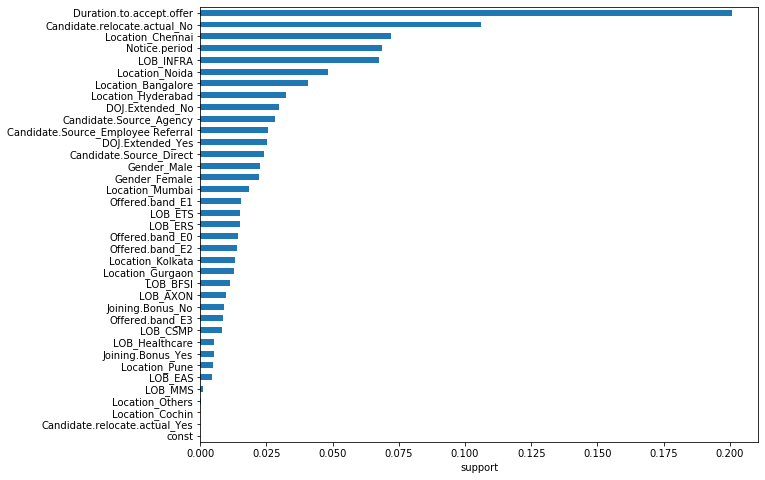

In [189]:
plt.figure(figsize=(10,8))
feaim= model_gini.tree_.compute_feature_importances()
fea_im= pd.Series(feaim,index=x_train.columns)
fea_im.sort_values().plot('barh')
plt.xlabel('support')

In [190]:
cmetrics= innomatics.classification_metrics(model_gini,x_train,x_test,y_train,y_test)
cmetrics.summary(labels=['no','yes'])

Summary Report
Confusion Matrix:

for train data

       no   yes    tot
no   5773   110   5883
yes   196  5621   5817
tot  5969  5731  11700

for test data

       no   yes   tot
no   1221   209  1430
yes   285  1211  1496
tot  1506  1420  2926
Classification Report:

 for train data

              precision    recall  f1-score   support

          no       0.97      0.98      0.97      5883
         yes       0.98      0.97      0.97      5817

    accuracy                           0.97     11700
   macro avg       0.97      0.97      0.97     11700
weighted avg       0.97      0.97      0.97     11700


 for test data

              precision    recall  f1-score   support

          no       0.81      0.85      0.83      1430
         yes       0.85      0.81      0.83      1496

    accuracy                           0.83      2926
   macro avg       0.83      0.83      0.83      2926
weighted avg       0.83      0.83      0.83      2926

Kappa Score for train data: 0.947686304744

In [191]:
train_score=[]
test_score=[]
for i in range(1,depth):
    model_tree =tree.DecisionTreeClassifier(criterion='gini',max_depth=i)
    model_tree.fit(x_train,y_train)
    train_score.append(model_tree.score(x_train,y_train))
    test_score.append(model_tree.score(x_test,y_test))

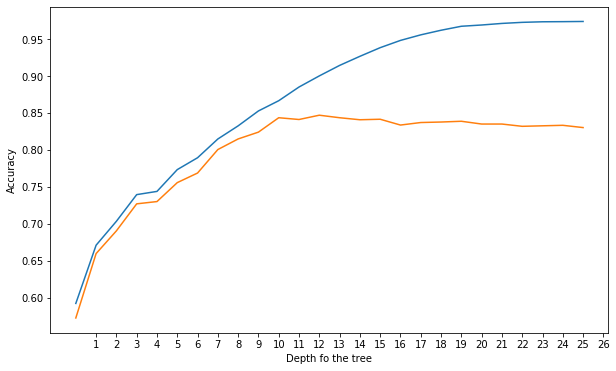

In [192]:
plt.figure(figsize=(10,6))
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(range(1,depth))
#plt.legend()
plt.xlabel('Depth fo the tree')
plt.ylabel('Accuracy')
plt.show()

In [193]:
## The accuracy for train and test is imbalnced.choose hyper parameters to get good accuracy for test data too using cv
##Considering max depth as 11 or 12 , after that test accuracy is almost const

In [194]:
y_train.shape

(11700,)

In [195]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

max_depth = range(1, 12, 4 ) # Minimum depth I took is 4 to get atleast a few rules about the data
criterion = ['gini', 'entropy']
splitter = ['random', 'best']
min_samples_split = [100, 200, 300]
min_samples_leaf = [50, 100, 150]
param_grid = dict(max_depth=max_depth, criterion = criterion, splitter=splitter,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, scoring='roc_auc', n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.8s


Best: 0.897013 using {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 100, 'splitter': 'random'}


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    5.1s finished


# Considering entropy with depth 9

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=1)

In [ ]:
model_ada = AdaBoostClassifier(base_estimator=dt,n_estimators=50)
model_ada.fit(x,y)

In [ ]:
model_ada.estimator_[1]

In [196]:
# build model now
final_tree =tree.DecisionTreeClassifier(criterion='entropy',max_depth=9)
final_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [197]:
cmetrics= innomatics.classification_metrics(final_tree,x_train,x_test,y_train,y_test)
cmetrics.summary(labels=['no','yes'])

Summary Report
Confusion Matrix:

for train data

       no   yes    tot
no   4672  1211   5883
yes   797  5020   5817
tot  5469  6231  11700

for test data

       no   yes   tot
no   1119   311  1430
yes   254  1242  1496
tot  1373  1553  2926
Classification Report:

 for train data

              precision    recall  f1-score   support

          no       0.85      0.79      0.82      5883
         yes       0.81      0.86      0.83      5817

    accuracy                           0.83     11700
   macro avg       0.83      0.83      0.83     11700
weighted avg       0.83      0.83      0.83     11700


 for test data

              precision    recall  f1-score   support

          no       0.82      0.78      0.80      1430
         yes       0.80      0.83      0.81      1496

    accuracy                           0.81      2926
   macro avg       0.81      0.81      0.81      2926
weighted avg       0.81      0.81      0.81      2926

Kappa Score for train data: 0.656878196228

In [198]:
# almost same accuracy for train and test

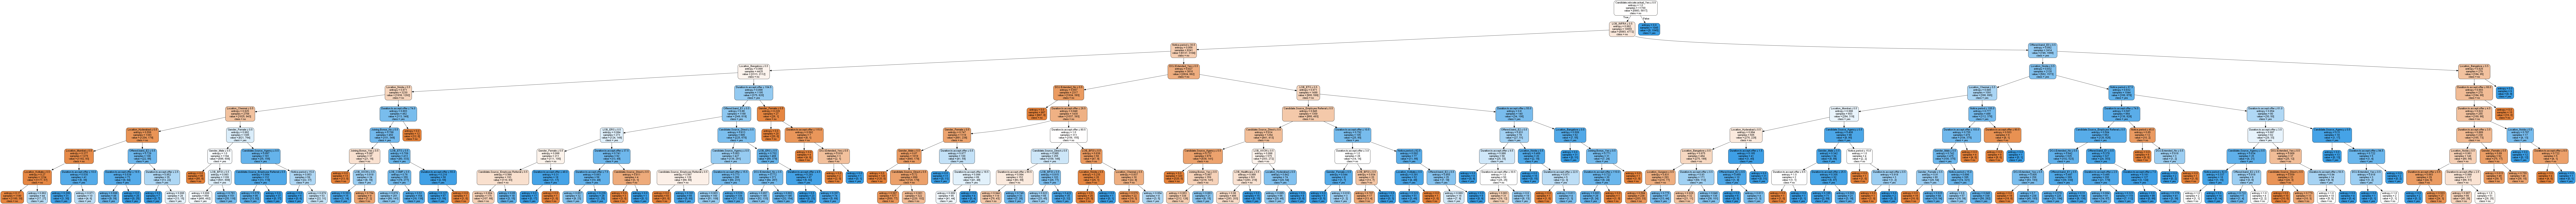

In [199]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_file = StringIO()
export_graphviz(final_tree, out_file=dot_file, 
                feature_names=x_train.columns,
                filled=True, rounded=True,
                class_names=['no', 'yes'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_file.getvalue())  
Image(graph.create_png())

In [200]:
# Visualizing the tree
dot_file= tree.export_graphviz(final_tree,out_file='HR_data.odt',
                               filled=True,feature_names=x_train.columns,
                               class_names=['no', 'yes'])
# saving fast cars data with dot file as `odt` format
file= pydotplus.graph_from_dot_file('HR_data.odt')
file.write_jpg('HR_data.jpg')
file.write_pdf('HR_data.pdf')

True


### Observations
- If a candidate has to relocate, he will most likely join the company (as shown in root node split)
- Most people who don't have Line of Business as INFRA are not joining
- Most people who are having Offer band_E0 are having a higher chance of joining
- People who having  Notice period <30 are chances of joining high
- people with base location Banglore and Gurgaon are not intrested to join  
- People who don't get Chennai or Noida as their base location have a lesser chance of joining
- People with more than 30 days notice have a lesser chance of joining